In [8]:
import pandas as pd
import numpy as np
!pip install plotly
!pip install wordcloud
from wordcloud import WordCloud
text = "Python is an amazing programming language. WordClouds are fun to create."
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df=pd.read_csv('food.csv')

In [10]:
print(df)

               name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian         45         25         

In [11]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [12]:
df.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [13]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [14]:
df.shape

(255, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [16]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [18]:
pie_df = df.diet.value_counts().reset_index()

In [21]:
pie_df.columns = ['diet','count']


In [22]:
fig = px.pie(pie_df, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',color_discrete_sequence=['green', 'red'])

In [23]:
fig.show()

In [25]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']

In [26]:
print(final_sweet_df)

                   name                                        ingredients  \
46       Obbattu holige  Maida flour, turmeric, coconut, chickpeas, jag...   
85         Dal makhani   Red kidney beans, urad dal, cream, garam masal...   
243  Mishti Chholar Dal  Chana dal, fresh coconut, ginger, cinnamon, ra...   

           diet  prep_time  cook_time flavor_profile       course  \
46   vegetarian        180         60          sweet  main course   
85   vegetarian         10         60          sweet  main course   
243  vegetarian         10         30          sweet  main course   

           state region  
46     Karnataka  South  
85        Punjab  North  
243  West Bengal   East  


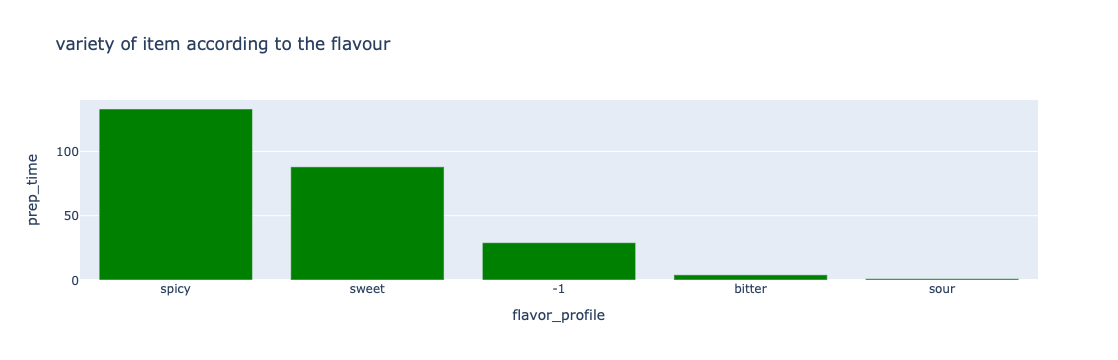

In [28]:
flav_df = df.flavor_profile.value_counts().reset_index()
flav_df.columns = ['flavor_profile', 'prep_time']
fig = px.bar(flav_df,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',
color_discrete_sequence=['green'])
fig.show()

In [29]:
cooking_time= df[['cook_time','name']]

In [31]:
cooking_time.head()

,cook_time,name
0,25,Balu shahi
1,30,Boondi
2,60,Gajar ka halwa
3,30,Ghevar
4,40,Gulab jamun


In [32]:
cooking_time.tail()


,cook_time,name
250,30,Til Pitha
251,60,Bebinca
252,-1,Shufta
253,45,Mawa Bati
254,-1,Pinaca


In [33]:
cooking_time.describe()

,cook_time
count,255.000000
mean,34.529412
std,48.265650
min,-1.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,720.000000


In [35]:
cooking_time.shape

(255, 2)

In [36]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [37]:
ten_cook_quickly=cooking_time.head(10)

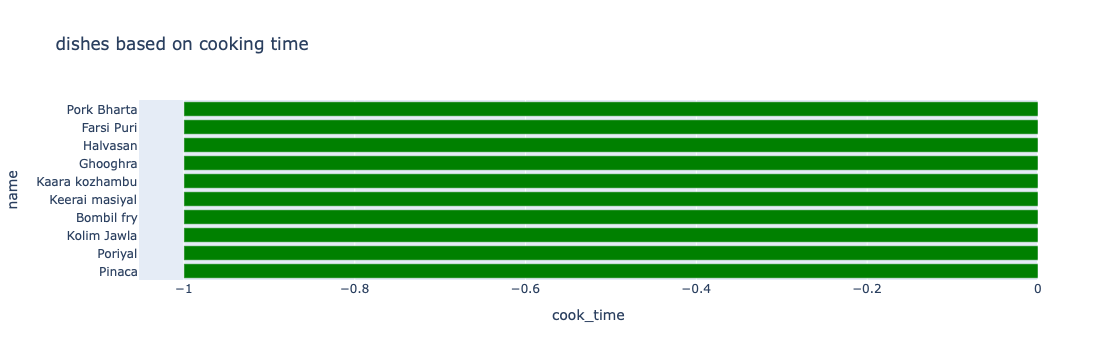

In [38]:
#cook_data.columns = ['cook_time', 'name']
fig = px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['green'])
fig.show()

In [39]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [40]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [41]:
tencooking_time_longest=cooking_time_longest.head(10)

In [42]:
import matplotlib.pyplot as plt

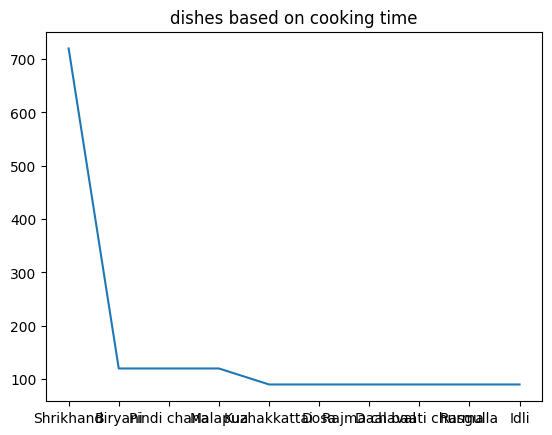

In [43]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()